## _Sprint - 4: Train the model on IBM_

### _Team-ID: PNT2022TMID21613_

#### Current Directory

In [1]:
pwd

'/home/wsuser/work'

#### Installing keras and tensorflow

In [2]:
!pip install keras==2.2.4
!pip install tensorflow

  Using cached Keras-2.2.4-py2.py3-none-any.whl (312 kB)
  Attempting uninstall: keras
    Found existing installation: keras 2.7.0
    Uninstalling keras-2.7.0:
      Successfully uninstalled keras-2.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.7.2 requires keras<2.8,>=2.7.0, but you have keras 2.2.4 which is incompatible.
  Using cached keras-2.7.0-py2.py3-none-any.whl (1.3 MB)
  Attempting uninstall: keras
    Found existing installation: Keras 2.2.4
    Uninstalling Keras-2.2.4:
      Successfully uninstalled Keras-2.2.4


### Understading the Data

#### Importing Libraries

In [3]:
import numpy as np
import tensorflow
import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils

#### Load Data

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


#### Analysing the Data

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
y_train[0]

5

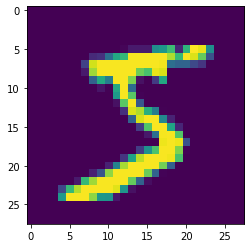

In [8]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

#### Reshaping the data

In [9]:
x_train = x_train.reshape(60000, 28, 28, 1).astype('float32')
x_test = x_test.reshape(10000, 28, 28, 1).astype('float32')
x_train[0]

array([[[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
    

#### One Hot Encoding

In [10]:
number_of_classes = 10
y_train = np_utils.to_categorical(y_train, number_of_classes)
y_test = np_utils.to_categorical(y_test, number_of_classes)

In [11]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Model Building

#### Adding CNN 

In [12]:
model = Sequential()

In [13]:
model.add(Conv2D(32, (3,3),input_shape=(28, 28, 1), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [14]:
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(Conv2D(64,(3,3), activation = 'relu'))

In [15]:
model.add(Conv2D(32,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [16]:
model.add(Flatten())
model.add(Dense(10, activation = 'softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 32)          18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 32)         0         
 2D)                                                    

#### Compiling the Model

In [18]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.Adam(), metrics=['accuracy'])

#### Train the model

In [19]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 5, batch_size = 120)

Epoch 1/5
500/500 [==============================] - 49s 97ms/step - loss: 0.5320 - accuracy: 0.9008 - val_loss: 0.1009 - val_accuracy: 0.9680
Epoch 2/5
500/500 [==============================] - 49s 98ms/step - loss: 0.0788 - accuracy: 0.9760 - val_loss: 0.0662 - val_accuracy: 0.9799
Epoch 3/5
500/500 [==============================] - 47s 95ms/step - loss: 0.0534 - accuracy: 0.9829 - val_loss: 0.0586 - val_accuracy: 0.9810
Epoch 4/5
500/500 [==============================] - 47s 94ms/step - loss: 0.0410 - accuracy: 0.9876 - val_loss: 0.0498 - val_accuracy: 0.9855
Epoch 5/5
500/500 [==============================] - 47s 95ms/step - loss: 0.0330 - accuracy: 0.9895 - val_loss: 0.0421 - val_accuracy: 0.9870


#### Testing the Model

In [20]:
prediction = model.predict(x_test[:4])
prediction

array([[2.1654209e-08, 1.9998014e-08, 3.4166157e-04, 1.4985858e-07,
        8.1087283e-11, 3.5488727e-11, 1.6825105e-17, 9.9965823e-01,
        1.2591119e-09, 9.8944293e-09],
       [6.4074619e-08, 1.0211050e-07, 9.9999964e-01, 5.8713021e-11,
        9.6762834e-11, 7.9461287e-15, 6.7626480e-08, 7.2430562e-11,
        1.9956554e-12, 9.3009897e-12],
       [4.9178260e-07, 9.9996698e-01, 5.5315041e-08, 4.4848045e-09,
        2.3077630e-05, 1.5436886e-08, 1.1440353e-06, 7.9526835e-06,
        9.7287604e-08, 1.7961756e-07],
       [9.9999058e-01, 6.4262032e-08, 4.6341288e-06, 1.8639275e-09,
        1.5889897e-08, 2.3844827e-08, 2.8730060e-06, 4.2914405e-09,
        1.8060895e-07, 1.5758064e-06]], dtype=float32)

In [21]:
np.argmax(prediction, axis=1)

array([7, 2, 1, 0])

#### Observing the metrics

In [22]:
metrics = model.evaluate(x_test, y_test, verbose=0)
print('METRICS\n Loss: {:0.3f}\n Accuracy: {:0.3f}'.format(metrics[0],metrics[1]))

METRICS
 Loss: 0.042
 Accuracy: 0.987


#### Saving the model

In [23]:
model.save('./models/IBM_mnistCNN.h5')

<div class="alert alert-block alert-success">
<b>Contributed By: </b> Kavi Bharathi K (142219104056)
</div>